v7 makes problems:
[Ideal(0.997, -0.071), Ideal(0.799, 0.602), Point(0.039, -0.737)]
[Ideal(0.995, 0.097), Ideal(-0.584, -0.812), Point(-0.437, -0.069)]
k=2

in approx the isCovered fails, multiple intersections with the edge that are not ideal:
[Ideal(0.782, 0.623), Ideal(0.785, -0.62), Ideal(-0.781, -0.624)]

Nice looking triangles:
PList = [Point(0.8, 0.516), Point(-0.215, -0.557), Point(-0.611, 0.639)]
k = 2

PList = [Point(-0.01, 0.868), Point(-0.311, -0.079), Ideal(0.863, 0.506)]
k = 2
Tri is CCW
Tri is delta-slim for delta = 0.8289549960754812


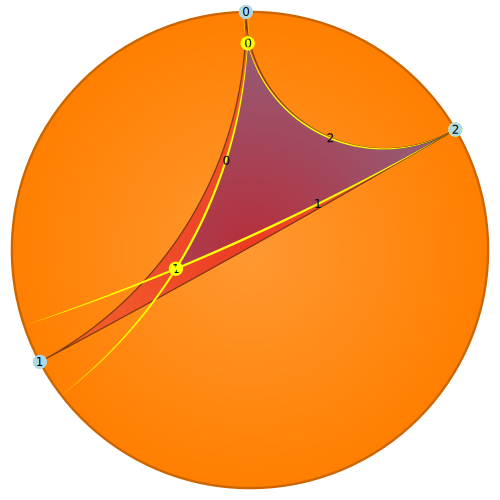

In [16]:
import random
import drawSvg 
from constructions import *
from deltaNeigbourhood import *
from hyperbolic.euclid.shapes import Circle as ECircle
from hyperbolic.poincare.shapes import *
from Triangle import *


backcolor = drawSvg.RadialGradient(0,0,1)
backcolor.addStop(0, '#ff9832', opacity=1)
backcolor.addStop(1, '#ff7f00', opacity=1)

polycolor1 = drawSvg.RadialGradient(0,0,1)
polycolor1.addStop(0, '#2c6493', opacity=1)
polycolor1.addStop(1, '#377eb8', opacity=1)

polycolor2 = drawSvg.RadialGradient(0,0,1)
polycolor2.addStop(0, '#e41a1c', opacity=0.75)
polycolor2.addStop(1, '#e94749', opacity=0.5)

backgroundStyle = dict(stroke='#cc6500', stroke_width=0.01, fill=backcolor)
polyStyle1 = dict(stroke='black', stroke_opacity=0.5, stroke_width=0.005,  fill=polycolor1)
polyStyle2 = dict(stroke='black', stroke_opacity=0.5, stroke_width=0.005, fill=polycolor2)
lineStyle1 = dict(hwidth=0.02, fill='#984ea3')
lineStyle2 = dict(hwidth=0.02, fill='yellow')
pointStyle1 = dict(hradius=0.02, fill='#984ea3')
pointStyle2 = dict(hradius=0.02, fill='yellow')


d = drawSvg.Drawing(2.1, 2.1, origin='center')
d.setRenderSize(500)
d.append(drawSvg.Circle(0, 0, 1, **backgroundStyle))

PList=randomPoints(3,1)

#PList = [Point(-0.564, 0.586), Point(0.564, -0.586), Point(0.58, 0.399)]
k = 2
#k=random.randint(0,2)

print('PList =', PList)
print('k =', k)

Tri=Triangle.fromVertices(PList)

IdealTri=Tri.surroundingIdealTriangle()

delta = Tri.approx()
#delta=0.3
d.draw(Tri, **polyStyle1)
#d.draw(Tri.neigbourhood(delta, k),**polyStyle2)
d.draw(IdealTri, **polyStyle2)

for i,v in enumerate(Tri.vertices):
    d.draw(v, radius=0.03, fill='yellow')
    d.draw(drawSvg.Text(str(i),0.05, *v, center=0.7))


for i,v in enumerate(IdealTri.vertices):
    d.draw(v, radius=0.03, fill='lightblue')
    d.draw(drawSvg.Text(str(i),0.05, *v, center=0.7))
'''
for i,e in enumerate(Tri.edges):
    d.draw(Tri.offsetEdge(i, delta, False), **lineStyle1)
'''
for i,e in enumerate(Tri.edges):
    d.draw(Tri.offsetEdge(i, 0, inner=True), **lineStyle2)
    d.draw(drawSvg.Text(str(i), 0.05, *e.projShape.midpoint(), center=0.7))

if Tri.isCCW():
    print('Tri is CCW')
else:
    print('Tri is CW')

if Tri.isDeltaslim(delta):
    print('Tri is delta-slim for delta =',delta)
else:
    print('Tri is not covered for delta =',delta)

#print(delta)
#print(np.log(1+2**0.5))
#d.savePng('triangleDeltaNbh.png')
d

In [ ]:
backcolor = drawSvg.LinearGradient(0,0,0,10)
backcolor.addStop(0, '#ff9832', opacity=1)
backcolor.addStop(0.2, '#ff7f00', opacity=1)

polycolor1 = drawSvg.LinearGradient(0,0,0,10)
polycolor1.addStop(0, '#2c6493', opacity=1)
polycolor1.addStop(0.2, '#377eb8', opacity=1)

polycolor2 = drawSvg.LinearGradient(0,0,0,10)
polycolor2.addStop(0, '#e41a1c', opacity=0.75)
polycolor2.addStop(0.2, '#e94749', opacity=0.5)

backgroundStyle = dict(stroke='#cc6500', stroke_width=0.01, fill=backcolor)
polyStyle1 = dict(stroke='black', stroke_opacity=0.5, stroke_width=0.005,  fill=polycolor1)
polyStyle2 = dict(stroke='black', stroke_opacity=0.5, stroke_width=0.005, fill=polycolor2)
lineStyle1 = dict(hwidth=0.02, fill='#984ea3')
lineStyle2 = dict(hwidth=0.02, fill='yellow')



halfplane= Transform.diskToHalf()
d = drawSvg.Drawing(9, 5, origin=(-9/2, -0.1))
d.append(drawSvg.Rectangle(-10,0, 20, 10, **backgroundStyle))
d.setRenderSize(w=750)


PList=randomPoints(3,2)
#PList=[Ideal.fromDegree(i/3*360) for i in range(2)]

#PList = [Point(-0.564, 0.586), Point(0.129, -0.654), Point(0.58, 0.399)]
k=2

print('PList =', PList)
print('k =', k)

Tri=Triangle.fromVertices(PList)

delta = Tri.approx()
delta=0.3
d.draw(Tri, transform=halfplane, **polyStyle1)
d.draw(deltaNbh(Tri,delta,k), transform=halfplane, **polyStyle2)

if Tri.isCCW():
    print('Tri is CCW')
else:
    print('Tri is CW')

if Tri.isDeltaslim(delta):
    print('Tri is delta-slim for delta =',delta)
else:
    print('Tri is not covered for delta =',delta)

d